# Importing the packages

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


# Loading the raw data

In [2]:
# Loading the data
df = pd.read_csv("data/dataset-immo.csv")
# checking the first 5 rows
df.head()

,url,locality,Type_property,subtype_property,price,type-transaction,n_rooms,living_area,equipped_kitchen,furnished,fireplace,terrace,area_terrace,garden,area-garden,land-surface,n-facades,swimming-pool,state-building
0,https://www.immoweb.be/en/classified/apartment...,Borgerhout,APARTMENT,APARTMENT,245000.0,FOR_SALE,2.0,106.0,1.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,3.0,0.0,JUST_RENOVATED
1,https://www.immoweb.be/en/classified/flat-stud...,Leuven,APARTMENT,FLAT_STUDIO,199000.0,FOR_SALE,0.0,31.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,4.0,0.0,GOOD
2,https://www.immoweb.be/en/classified/apartment...,Lede,APARTMENT,APARTMENT,195000.0,FOR_SALE,2.0,91.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,3.0,0.0,AS_NEW
3,https://www.immoweb.be/en/classified/apartment...,Gent,APARTMENT,APARTMENT,185000.0,FOR_SALE,2.0,101.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,TO_RESTORE
4,https://www.immoweb.be/en/classified/penthouse...,Hotton,APARTMENT,PENTHOUSE,375000.0,FOR_SALE,3.0,214.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,TO_BE_DONE_UP


## Descriptive statistics over the dataset

In [4]:
df.describe()

,price,n_rooms,living_area,equipped_kitchen,furnished,fireplace,terrace,area_terrace,garden,area-garden,land-surface,n-facades,swimming-pool
count,1.001300e+04,10013.000000,9843.000000,10013.000000,10013.000000,10013.000000,10013.000000,7620.000000,10013.000000,8920.00000,10013.00000,8113.000000,10013.000000
mean,5.082320e+05,2.994407,173.863253,0.866374,0.043943,0.375911,0.721662,17.192520,0.358534,233.80157,619.39968,2.736842,0.032358
std,5.532948e+05,1.732388,132.057334,0.340267,0.204978,0.484381,0.448203,32.555167,0.479594,2018.02311,5724.22333,0.865111,0.176958
min,1.000000e+04,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,2.390000e+05,2.000000,92.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,2.000000,0.000000
50%,3.490000e+05,3.000000,137.000000,1.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.00000,0.00000,2.000000,0.000000
75%,5.550000e+05,4.000000,211.000000,1.000000,0.000000,1.000000,1.000000,21.000000,1.000000,41.00000,434.00000,4.000000,0.000000
max,8.100000e+06,46.000000,1700.000000,1.000000,1.000000,1.000000,1.000000,800.000000,1.000000,87000.00000,500000.00000,6.000000,1.000000


# Cleaning the data

## Removing duplicated rows

In [278]:
# checking for duplicate rows
duplicate_rows = df[df.duplicated()]
# view duplicated rows
duplicate_rows
# keeping first duplicated rows and checking if they were removed
df.drop_duplicates()
# dropping all the duplicates
df.to_csv("data/dataset-immo.csv", index=False)


# Cleaning the data

## Replacing blank spaces to 0

In [279]:
# using regex to identify blank strings and replace it to NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

df

,url,locality,Type_property,subtype_property,price,type-transaction,n_rooms,living_area,equipped_kitchen,furnished,fireplace,terrace,area_terrace,garden,area-garden,land-surface,n-facades,swimming-pool,state-building
0,https://www.immoweb.be/en/classified/apartment...,Borgerhout,APARTMENT,APARTMENT,245000.0,FOR_SALE,2.0,106.0,1.0,0.0,1.0,1.0,6.0,0.0,0.0,0.0,3.0,0.0,JUST_RENOVATED
1,https://www.immoweb.be/en/classified/flat-stud...,Leuven,APARTMENT,FLAT_STUDIO,199000.0,FOR_SALE,0.0,31.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,4.0,0.0,GOOD
2,https://www.immoweb.be/en/classified/apartment...,Lede,APARTMENT,APARTMENT,195000.0,FOR_SALE,2.0,91.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,3.0,0.0,AS_NEW
3,https://www.immoweb.be/en/classified/apartment...,Gent,APARTMENT,APARTMENT,185000.0,FOR_SALE,2.0,101.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,TO_RESTORE
4,https://www.immoweb.be/en/classified/penthouse...,Hotton,APARTMENT,PENTHOUSE,375000.0,FOR_SALE,3.0,214.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,TO_BE_DONE_UP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015,https://www.immoweb.be/en/classified/villa/for...,Aalst,HOUSE,VILLA,495000.0,FOR_SALE,5.0,238.0,1.0,0.0,0.0,1.0,135.0,1.0,710.0,1200.0,NaN,0.0,AS_NEW
10016,https://www.immoweb.be/en/classified/house/for...,Waregem,HOUSE,HOUSE,500000.0,FOR_SALE,2.0,140.0,1.0,0.0,1.0,1.0,10.0,0.0,0.0,0.0,2.0,0.0,TO_BE_DONE_UP
10017,https://www.immoweb.be/en/classified/house/for...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10018,https://www.immoweb.be/en/classified/villa/for...,Blankenberge,HOUSE,VILLA,525000.0,FOR_SALE,5.0,290.0,1.0,0.0,0.0,1.0,20.0,1.0,600.0,737.0,NaN,0.0,GOOD


# Data Analysis

## Study 1: correlation between variables and price

In [280]:
# Checking the total of rows and columns (respectively): 10.020 ; 19
print(df.shape)

# Checking all columns headers
df.columns

(10020, 19)


Index(['url', 'locality', 'Type_property', 'subtype_property', 'price',
       'type-transaction', 'n_rooms', 'living_area', 'equipped_kitchen',
       'furnished', 'fireplace', 'terrace', 'area_terrace', 'garden',
       'area-garden', 'land-surface', 'n-facades', 'swimming-pool',
       'state-building'],
      dtype='object')

Text(0.5, 1.0, 'Quantitative Variables and Its Correlation')

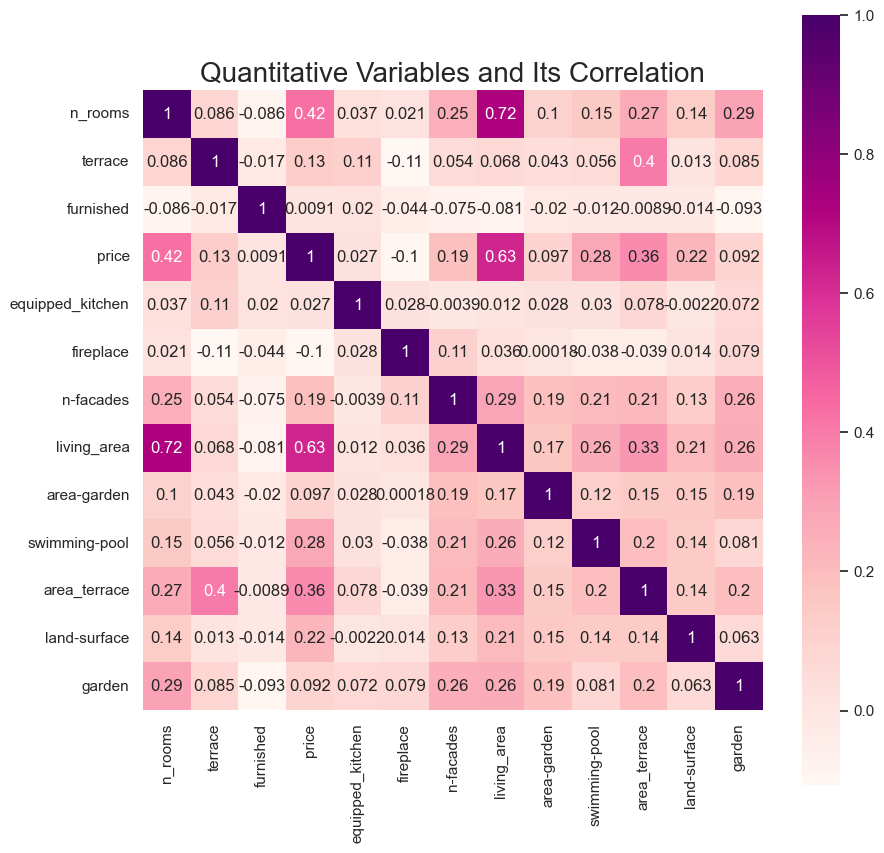

In [397]:
# Investigating the correlation of all the variables to one to another
# Which variables have the greatest influence on the price

# Removal of qualitative variables
my_cols = set(df.columns)
my_cols.remove('url')
my_cols.remove('locality')
my_cols.remove('Type_property')
my_cols.remove('subtype_property')
my_cols.remove('type-transaction')
my_cols.remove('state-building')
my_cols = list(my_cols)
df2 = df[my_cols]

# Heatmap plot
df2.describe()
correlation = df2.corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap="RdPu")
ax.axes.set_title("Quantitative Variables and Its Correlation",fontsize=20)

# For the quantitative variables, it's possible to notice that living area, number of rooms and swimming pool have the major impact on the price.
# And the variables with the minumum impact, they are: furnished, garden and area garden

## Study of the correlation between price and 3 variables with the greatest influence

/Users/andre/Documents/GitHub/immo-analysis-project/data-analysis-immo/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


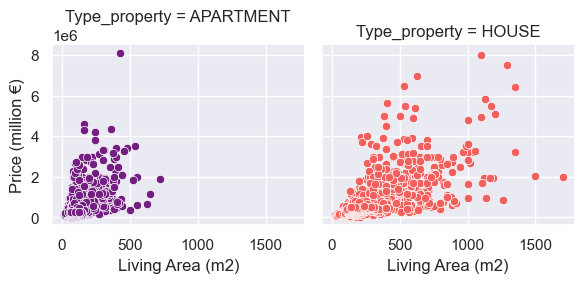

In [399]:
# Investigating the correlation between price and living area
sns.set(rc={'figure.figsize':(18,10)})
g = sns.FacetGrid(df, col='Type_property', hue='Type_property', palette='magma')
g.map(sns.scatterplot, 'living_area', 'price')
g.set_xlabels('Living Area (m2)')
g.set_ylabels('Price (million €)')


/Users/andre/Documents/GitHub/immo-analysis-project/data-analysis-immo/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


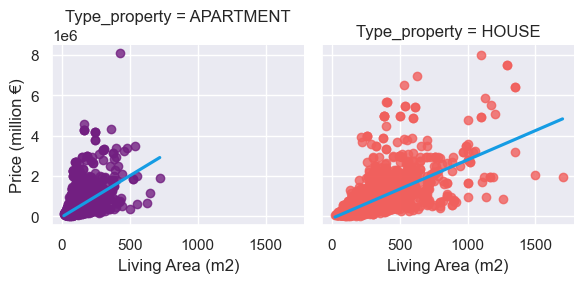

In [356]:
# Investigating the correlation between price and living area
ax = sns.lmplot(x='living_area', y='price', data=df, height=3, col='Type_property', ci=None, line_kws={'color':'#159CE4'}, hue='Type_property', palette='magma')
ax.set_xlabels('Living Area (m2)')
ax.set_ylabels('Price (million €)')

/Users/andre/Documents/GitHub/immo-analysis-project/data-analysis-immo/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


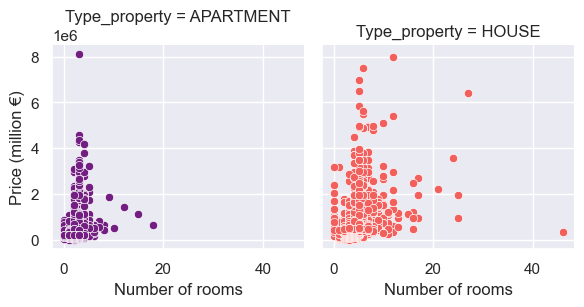

In [436]:
# Investigating the corelation between price and number of rooms
g = sns.FacetGrid(df, col='Type_property', hue='Type_property', palette='magma')
g.map(sns.scatterplot, 'n_rooms', 'price')
g.set_xlabels('Number of rooms')
g.set_ylabels('Price (million €)')
g.fig.subplots_adjust(top=0.9)

/Users/andre/Documents/GitHub/immo-analysis-project/data-analysis-immo/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


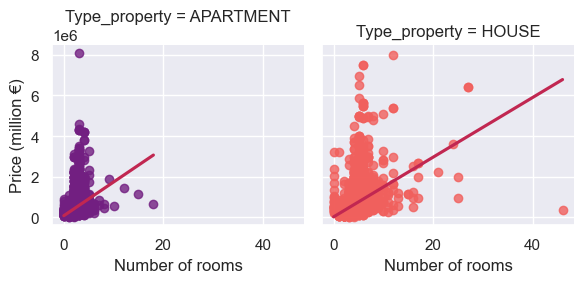

In [366]:
# Investigating the corelation between price and living area
ax = sns.lmplot(x='n_rooms', y='price', data=df, height=3, col='Type_property', ci=None, line_kws={'color':'#C12751'}, hue='Type_property', palette='magma')
ax.set_xlabels('Number of rooms')
ax.set_ylabels('Price (million €)')

[Text(0.5, 0, 'Swimming Pool (Yes = 1; No = 0)'),
 Text(0, 0.5, 'Price (million €)'),
 Text(0.5, 1.0, 'Swimming Pool and its Influence on the Price')]

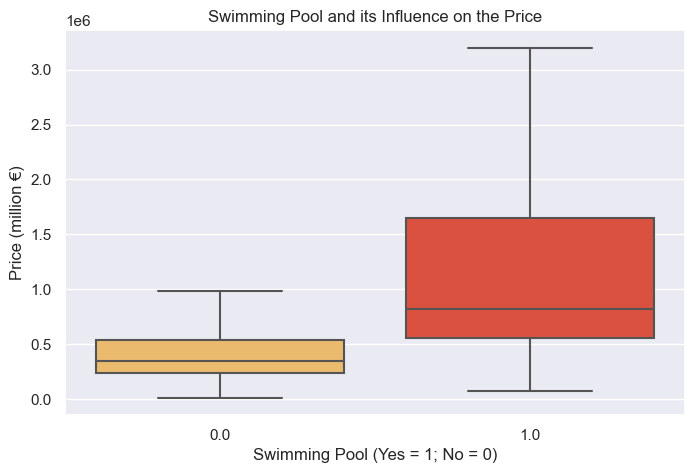

In [433]:
# Investigating the corelation between price and swimming pool
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.boxplot(x='swimming-pool', y='price', data=df, showfliers=False, palette='YlOrRd')
ax.set(xlabel='Swimming Pool (Yes = 1; No = 0)', ylabel='Price (million €)', title='Swimming Pool and its Influence on the Price')

/Users/andre/Documents/GitHub/immo-analysis-project/data-analysis-immo/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


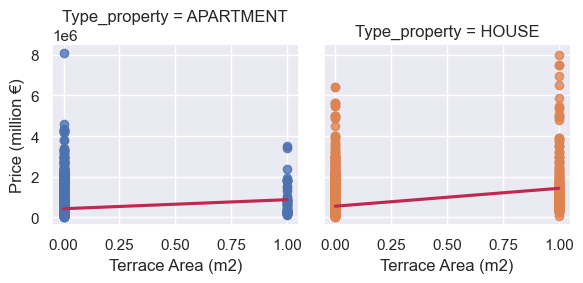

In [431]:
# Investigating the corelation between price and living area
ax = sns.lmplot(x='swimming-pool', y='price', data=df, height=3, col='Type_property', ci=None, hue='Type_property', line_kws={'color':'#C12751'})
ax.set_xlabels('Terrace Area (m2)')
ax.set_ylabels('Price (million €)')

## Study of the correlation between price and 3 variables with the least influence

/Users/andre/Documents/GitHub/immo-analysis-project/data-analysis-immo/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


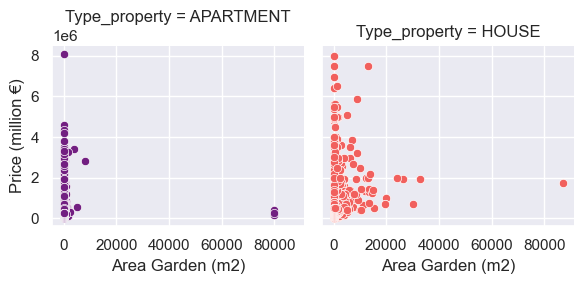

In [428]:
# Investigating the correlation between price and area garden
sns.set(rc={'figure.figsize':(12,8)})
g = sns.FacetGrid(df, col='Type_property', hue='Type_property', palette='magma')
g.map(sns.scatterplot, 'area-garden', 'price')
g.set_xlabels('Area Garden (m2)')
g.set_ylabels('Price (million €)')

/Users/andre/Documents/GitHub/immo-analysis-project/data-analysis-immo/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


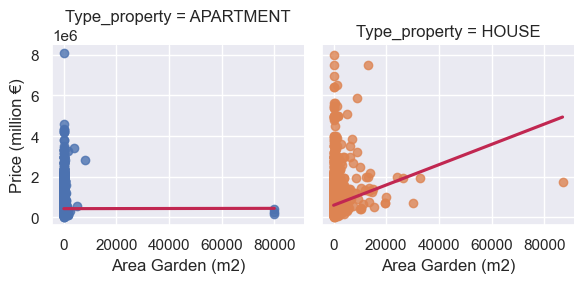

In [289]:
# Investigating the corelation between price and area garden
ax = sns.lmplot(x='area-garden', y='price', data=df, height=3, col='Type_property', ci=None, hue='Type_property', line_kws={'color':'#C12751'})
ax.set_xlabels('Area Garden (m2)')
ax.set_ylabels('Price (million €)')

[Text(0.5, 0, 'Garden (Yes = 1; No = 0)'),
 Text(0, 0.5, 'Price (million €)'),
 Text(0.5, 1.0, 'Garden Per Price Correlation')]

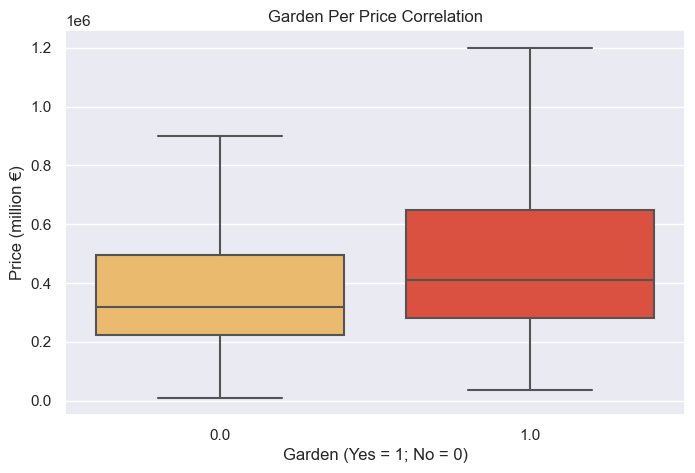

In [423]:
# Investigating the correlation between price and garden for both, houses and appartments
# outliers were ommited
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.boxplot(x='garden', y='price', data=df, showfliers=False, palette='YlOrRd')
ax.set(xlabel='Garden (Yes = 1; No = 0)', ylabel='Price (million €)', title='Garden Per Price Correlation')

[Text(0.5, 0, 'Furnished (Yes = 1; No = 0)'),
 Text(0, 0.5, 'Price (million €)'),
 Text(0.5, 1.0, 'Is Furnished or Not and the Correlation with the Price')]

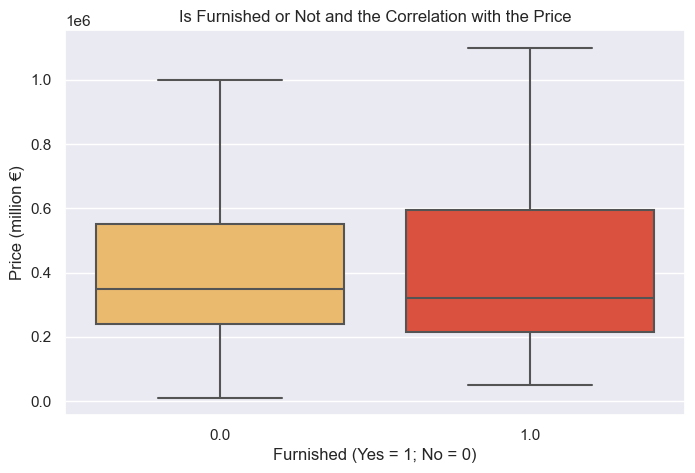

In [425]:
# Investigating the correlation between price and furnished, for both, houses and appartments
# outliers were ommited
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.boxplot(x='furnished', y='price', data=df, showfliers=False, palette='YlOrRd')
ax.set(xlabel='Furnished (Yes = 1; No = 0)', ylabel='Price (million €)', title='Is Furnished or Not and the Correlation with the Price')

/Users/andre/Documents/GitHub/immo-analysis-project/data-analysis-immo/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/andre/Documents/GitHub/immo-analysis-project/data-analysis-immo/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


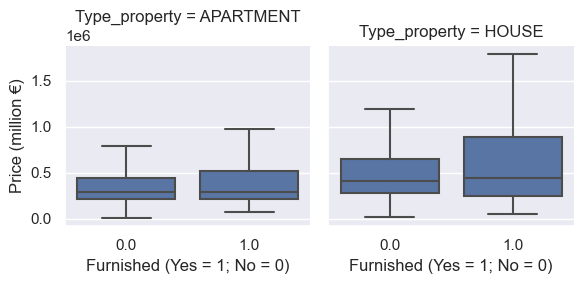

In [374]:
# Investigating the corelation between price and furnished per type of property
sns.set(rc={'figure.figsize':(12,8)})
g = sns.FacetGrid(df, col='Type_property')
g.map(sns.boxplot, 'furnished', 'price', showfliers=False)
g.set_xlabels('Furnished (Yes = 1; No = 0)')
g.set_ylabels('Price (million €)')

/Users/andre/Documents/GitHub/immo-analysis-project/data-analysis-immo/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/andre/Documents/GitHub/immo-analysis-project/data-analysis-immo/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


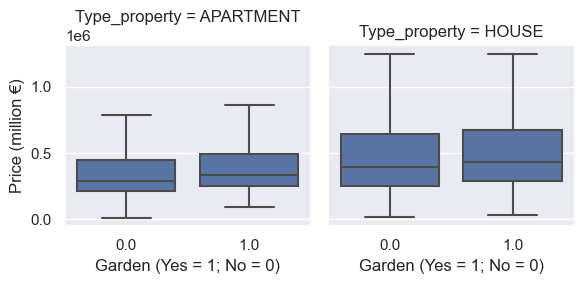

In [293]:
# Investigating the correlation between price and equipped kitchen per type of property
sns.set(rc={'figure.figsize':(12,8)})
g = sns.FacetGrid(df, col='Type_property')
g.map(sns.boxplot, 'garden', 'price', showfliers=False)
g.set_xlabels('Garden (Yes = 1; No = 0)')
g.set_ylabels('Price (million €)')

## Investigation of the influence of the qualitative variables on the price

Text(0.5, 1.0, 'Correlation of the Price Per Type of Property')

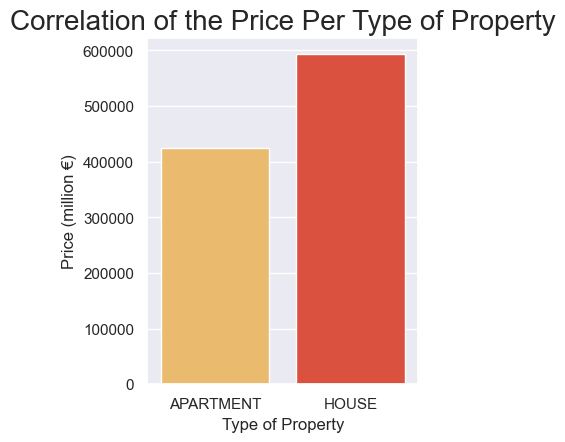

In [401]:
# Investigating the correlation between price and type of property
sns.set(rc={'figure.figsize':(3.5,4.5)})
ax = sns.barplot(x='Type_property', y='price', data=df, errorbar=None, palette='YlOrRd')
ax.set(xlabel='Type of Property', ylabel='Price (million €)')
ax.axes.set_title("Correlation of the Price Per Type of Property",fontsize=20)

Text(0.5, 1.0, 'Correlation of the Price Per Subtype of Property')

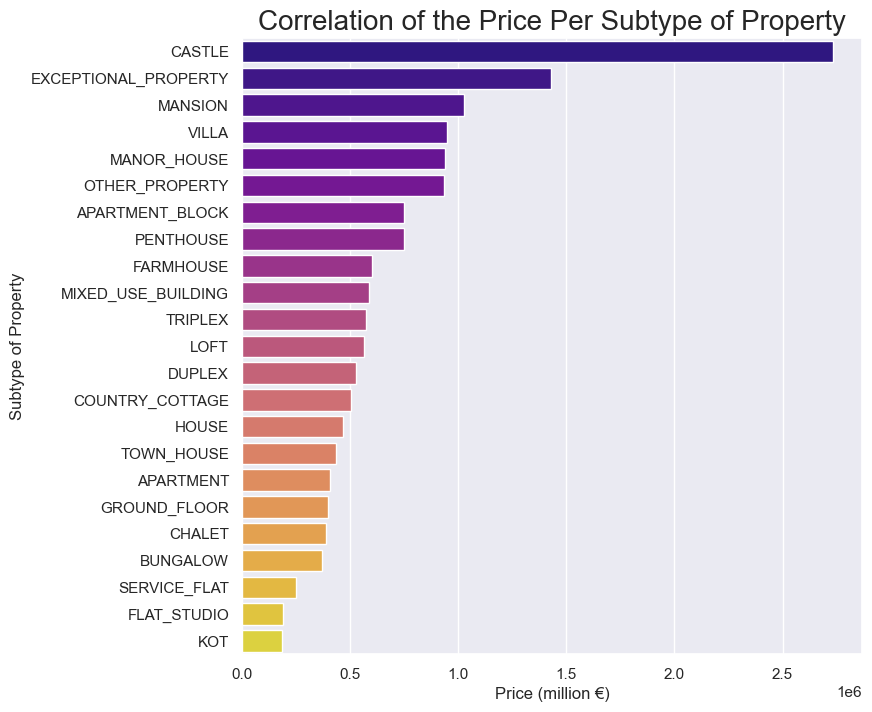

In [402]:
# Investigating the correlation between price and type of property

# Grouping the values of subtype property per price in descending order. This group will be use to set the order of how the data is displayed
df_agg = df.groupby(['subtype_property'])['price'].mean().reset_index().sort_values('price', ascending=False)
# Setting the size of the plot
sns.set(rc={'figure.figsize':(8,8)})
# Plotting the barplot 
ax = sns.barplot(x='price', y='subtype_property', data=df, errorbar=None, order=df_agg['subtype_property'], palette='plasma')
ax.set(xlabel='Price (million €)', ylabel='Subtype of Property')
ax.axes.set_title("Correlation of the Price Per Subtype of Property",fontsize=20)

/var/folders/mt/pt1166mn2jd0650kz_y92n080000gn/T/ipykernel_3424/434442718.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


Text(0.5, 1.0, 'Correlation of the Price Per State of the Building')

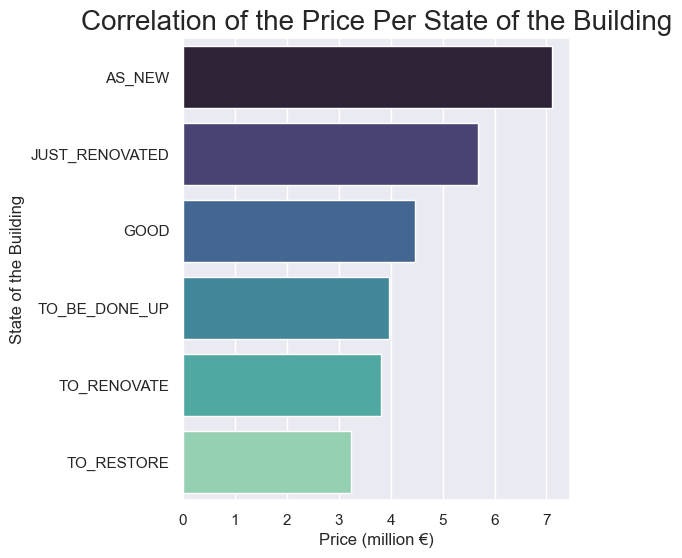

In [403]:
# Investigating the correlation between price and state of the building
sns.set(rc={'figure.figsize':(5,6)})
# The order was set like this in order to remove the NaN group value to be displayed
ax = sns.barplot(x='price', y='state-building', data=df, errorbar=None, order=['AS_NEW', 'JUST_RENOVATED', 'GOOD', 'TO_BE_DONE_UP', 'TO_RENOVATE', 'TO_RESTORE'], palette='mako')
ax.set(xlabel='Price (million €)', ylabel='State of the Building')

# Rounding the x axis tick labels --> It was 1000000, ...
xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()/100000]
ax.set_xticklabels(xlabels)
ax.axes.set_title("Correlation of the Price Per State of the Building",fontsize=20)

Text(0.5, 1.0, 'Correlation of the Price Per City')

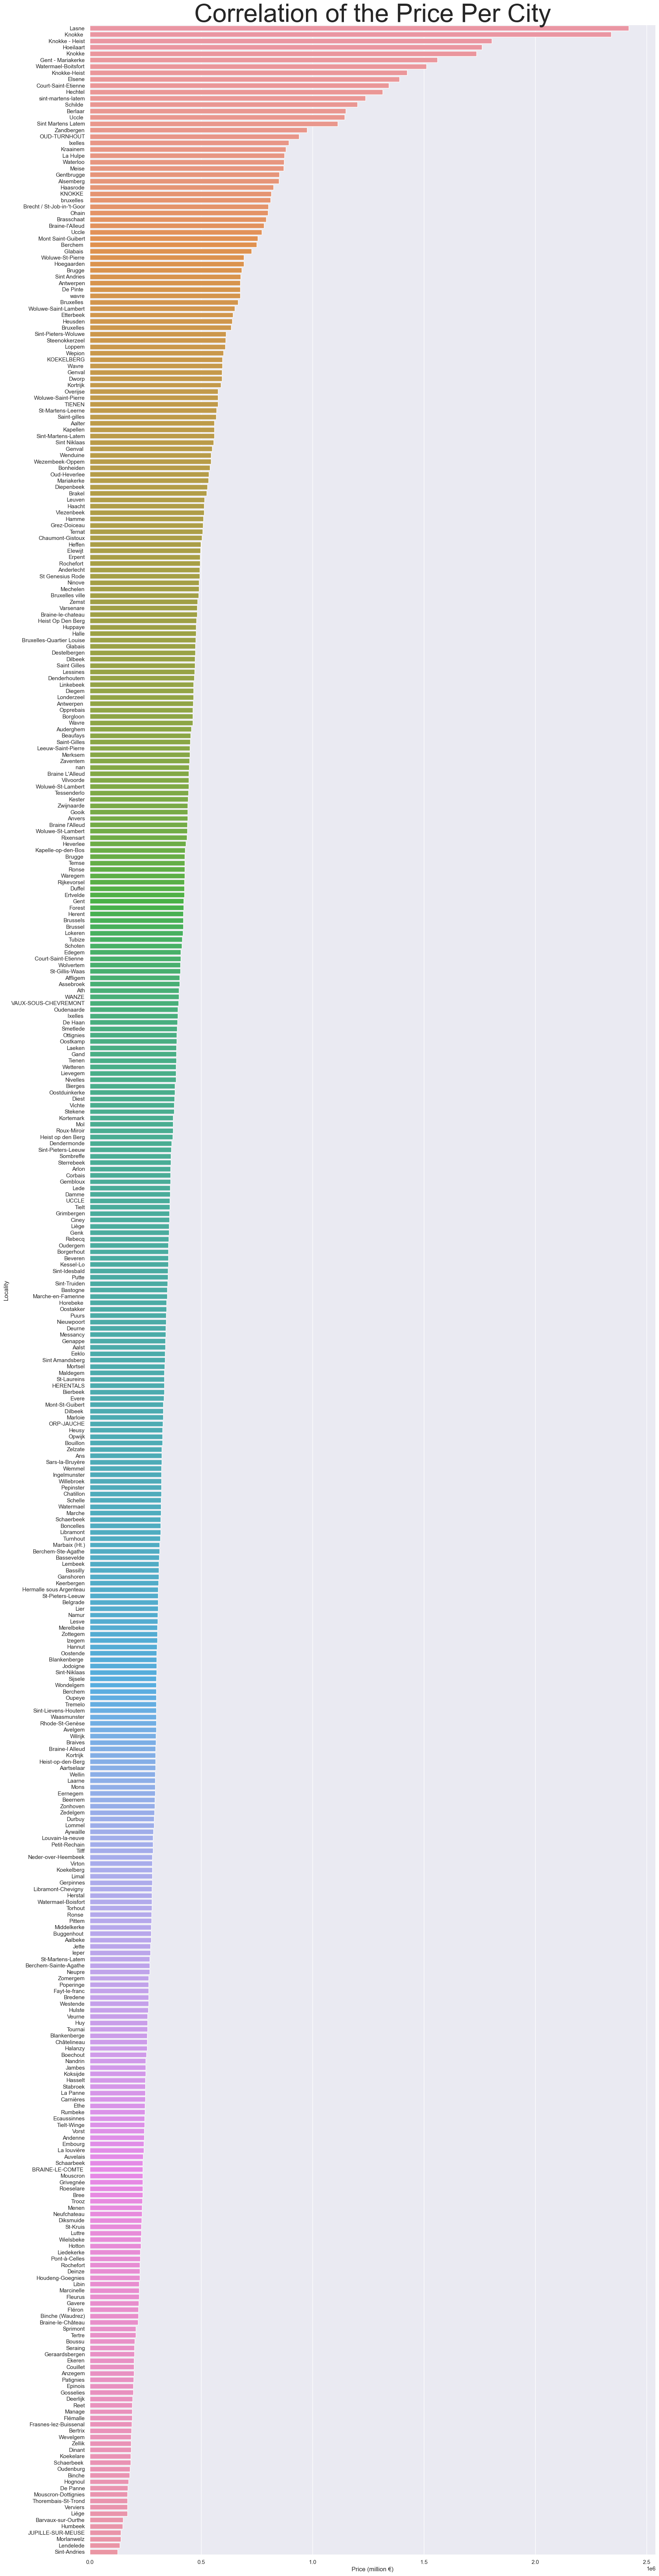

In [405]:
# Understanding which cities has the higher and lowest property value
# It was necessary to plot it bigger to be able to read all the y labels
sns.set(rc={'figure.figsize':(20,90)})
df_agg = df.groupby(['locality'])['price'].mean().reset_index().sort_values('price', ascending=False)
ax = sns.barplot(x='price', y='locality', data=df, errorbar=None, order=df_agg['locality'])
ax.set(xlabel='Price (million €)', ylabel='Locality')
ax.axes.set_title("Correlation of the Price Per City",fontsize=50)

In [3]:
# Importing the dataset with the information of Provinces
df2 = pd.read_csv("data/with_provinces_dataset.csv")
# Removing duplicated rows
df2.drop_duplicates(inplace=True)
# Checking up the size of this dataset
df2.shape


(10020, 21)

/var/folders/mt/pt1166mn2jd0650kz_y92n080000gn/T/ipykernel_3424/162137090.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


Text(0.5, 1.0, 'Influence on the Price According to the Provinces')

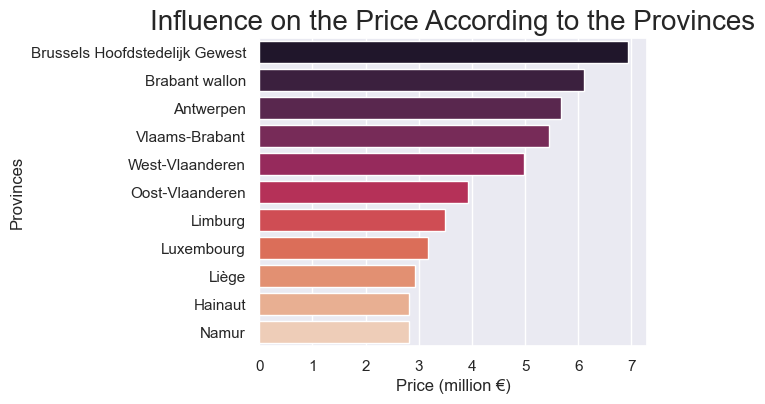

In [410]:
# Using the new dataset to understand the influence of the price per province
sns.set(rc={'figure.figsize':(5,4)})
# Groupping the Provinces in order to be displayed from the highest value to the smallest one
df_agg = df2.groupby(['province'])['price'].mean().reset_index().sort_values('price', ascending=False)
ax = sns.barplot(x='price', y='province', data=df2, errorbar=None, order=df_agg['province'], palette='rocket')
ax.set(xlabel='Price (million €)', ylabel='Provinces')
# Rounding the x axis tick labels --> It was 1000000, ...
xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()/100000]
ax.set_xticklabels(xlabels)
# Setting a title
ax.axes.set_title("Influence on the Price According to the Provinces",fontsize=20)


/var/folders/mt/pt1166mn2jd0650kz_y92n080000gn/T/ipykernel_3424/2743438064.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


Text(0.5, 1.0, 'Influence on the Price According to the Provinces Per Type of Property')

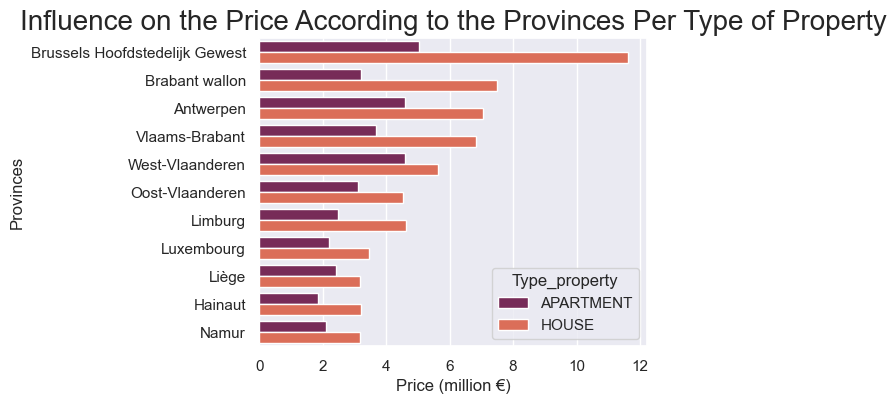

In [435]:
# Using the new dataset to understand the influence of the price per province
sns.set(rc={'figure.figsize':(5,4)})
# Groupping the Provinces in order to be displayed from the highest value to the smallest one
df_agg = df2.groupby(['province'])['price'].mean().reset_index().sort_values('price', ascending=False)
ax = sns.barplot(x='price', y='province', data=df2,hue='Type_property', errorbar=None, order=df_agg['province'], palette='rocket')
ax.set(xlabel='Price (million €)', ylabel='Provinces')
# Rounding the x axis tick labels --> It was 1000000, ...
xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()/100000]
ax.set_xticklabels(xlabels)
# Setting a title
ax.axes.set_title("Influence on the Price According to the Provinces Per Type of Property",fontsize=20)

Text(0.5, 1.0, 'Amount of Properties Per Province')

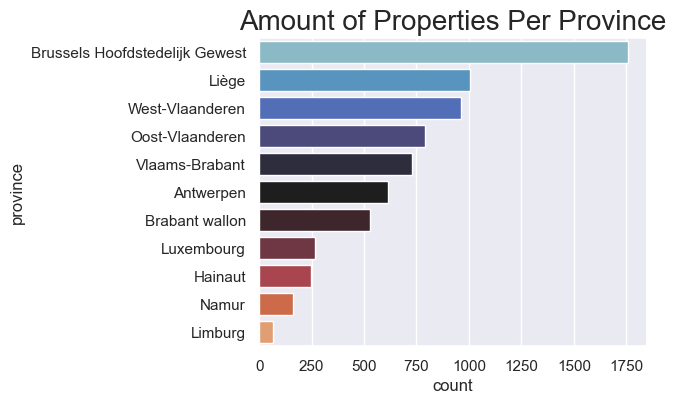

In [411]:
# Checking up the amount of properties per province
sns.set(rc={'figure.figsize':(5,4)})
ax = sns.countplot(data=df2, y='province', order=df2['province'].value_counts().index, palette='icefire')
ax.axes.set_title("Amount of Properties Per Province",fontsize=20)

Text(0.5, 1.0, 'Amount of Properties According to their Surfaces')

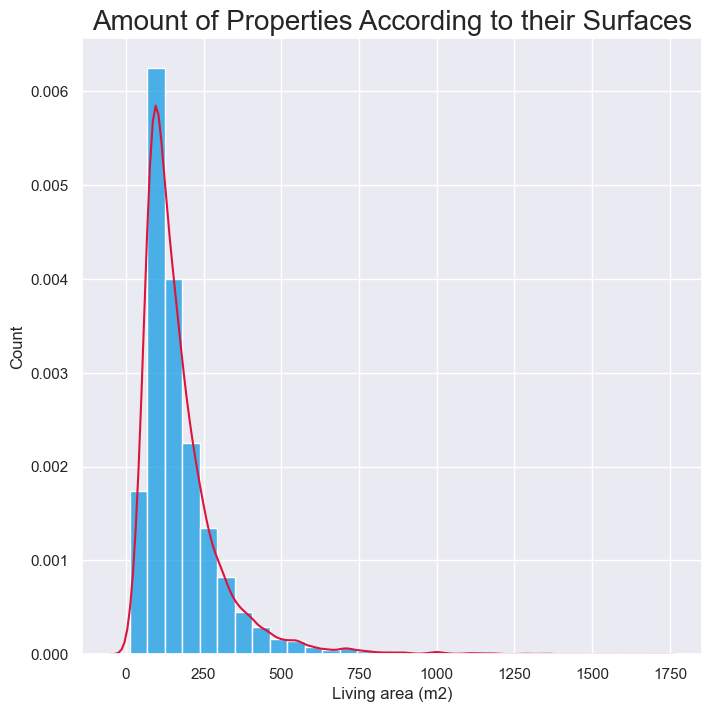

In [412]:
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.histplot(data=df, x= 'living_area', kde=False, bins=30, stat="density", color='#159CE4')
sns.kdeplot(data=df, x= 'living_area', color='crimson', ax=ax)
ax.set(xlabel='Living area (m2)', ylabel='Count')
ax.axes.set_title("Amount of Properties According to their Surfaces",fontsize=20)

## Investigation of the amount of missing data

Text(0.5, 1.0, 'Amount of Missing Data')

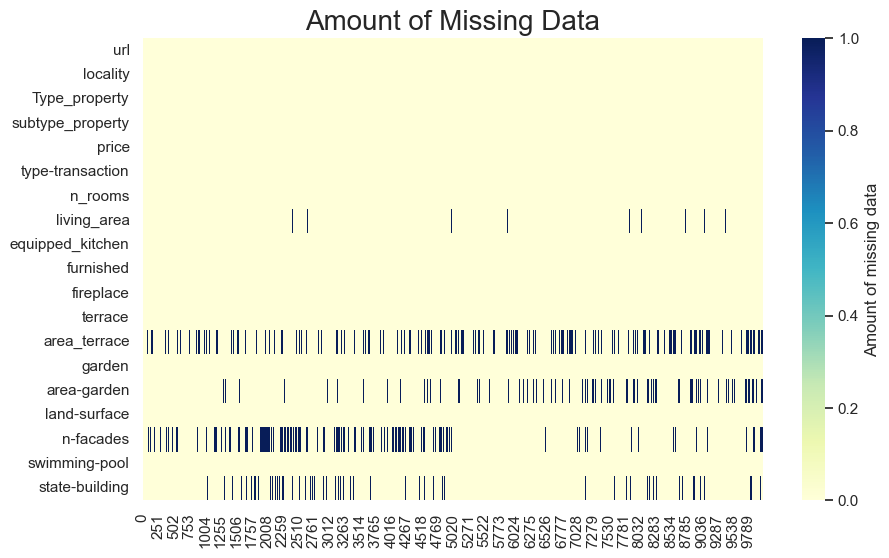

In [414]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Amount of missing data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)
ax.axes.set_title("Amount of Missing Data",fontsize=20)